### Percentage of loan paid for all accounts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in data
accounts = pd.read_csv("../Resources/accounts.csv")
groups = pd.read_csv("../Resources/groups.csv")
payments = pd.read_csv("../Resources/payments.csv")

In [3]:
# Sum payment amounts
payments_ct = payments.groupby('account_id', as_index=False)['amount'].sum()

# Rename column
payments_ct = payments_ct.rename(columns={'id':'num_payments'})

In [4]:
# Limit columns in accounts dataframe
accounts = accounts[['id','group_id','is_written_off','is_unlocked']]

In [5]:
# Merge payments and accounts dataframe
merged_df = pd.merge(left=payments_ct,right=accounts,how='inner',left_on='account_id',right_on='id')

In [6]:
# Drop column
merged_df = merged_df.drop(columns=['id'])

In [7]:
# Merge with groups dataframe
merged_df = pd.merge(left=merged_df,right=groups,how='inner',left_on='group_id',right_on='id')

In [8]:
# Limit columns
merged_df = merged_df[['account_id','is_written_off','is_unlocked','amount','price_unlock']]

In [9]:
# Rename column
merged_df = merged_df.rename(columns={'amount':'amount_paid'})

# Add column
merged_df['pct_paid'] = round((merged_df['amount_paid']/merged_df['price_unlock']) * 100)

In [10]:
merged_df.head()

,account_id,is_written_off,is_unlocked,amount_paid,price_unlock,pct_paid
0,1,False,False,1900,8100,23.0
1,2,False,True,8100,8100,100.0
2,3,False,False,7661,8100,95.0
3,4,False,True,8100,8100,100.0
4,5,False,False,6743,8100,83.0


In [11]:
# Export to csv
merged_df.to_csv('../Output/Part2/account_progress.csv',index=False)

### Visualize status of ongoing accounts

In [12]:
# Filter for 'ongoing' accounts
merged_df = merged_df[(merged_df['pct_paid']>0)&(merged_df['pct_paid']<100)]

In [13]:
# Group by percent paid
merged_df_grouped = merged_df.groupby('pct_paid',as_index=False)['account_id'].count()

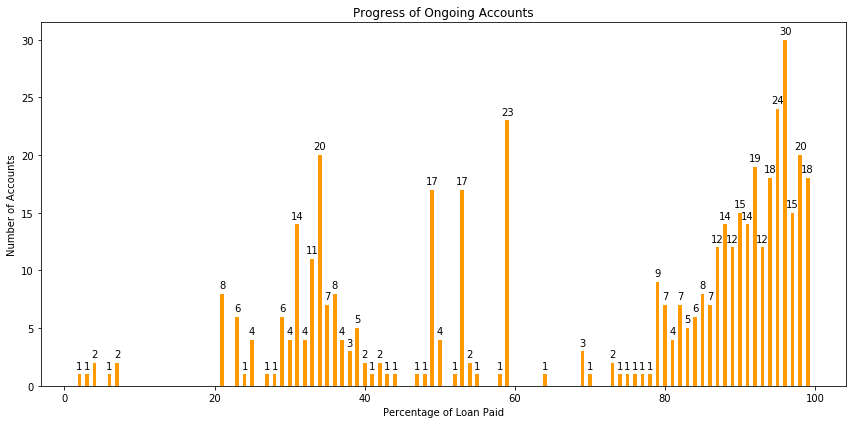

In [14]:
# Set values
x = merged_df_grouped['pct_paid']
y = merged_df_grouped['account_id']

# Create figure
plt.figure(figsize=(12,6))
rect = plt.bar(x, y, width=0.5, color="#ff9900")

# Label figure
plt.title('Progress of Ongoing Accounts')
plt.xlabel('Percentage of Loan Paid')
plt.ylabel('Number of Accounts')

# Create function to label bars
def label_bars(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height+0.3, round(height),
                ha='center', va='bottom', color="black")

# Call function
label_bars(rect)

# Save figure
plt.savefig('../Output/Part2/progress_of_ongoing_accounts.png')

# Show figure
plt.tight_layout()
plt.show()